# Plot histograms of positions with a given percentage of mutations

Across each genome. Pretty similar to the mutation profile. In the text we define this as the "approximate" mutation profile.

In [1]:
%run "Header.ipynb"
%run "LoadMutationJSONData.ipynb"

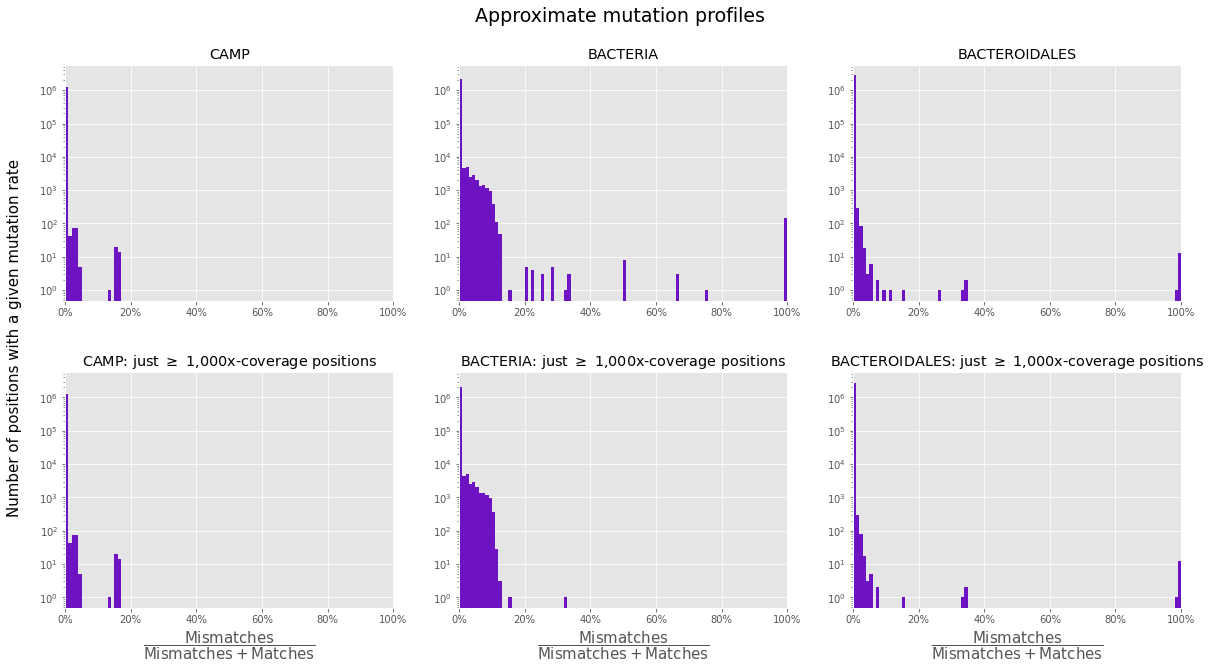

In [5]:
fig, axes = pyplot.subplots(2, 3, sharey=True, gridspec_kw={"hspace": 0.3})

# See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html.
# "In other words, if bins is [1, 2, 3, 4], then
# the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3).
# The last bin, however, is [3, 4], which includes 4."
#
# We want to have one bin for [0%, 1%), another for [1%, 2%), and so on, until
# we have ... [98%, 99%), [99%, 100%].
#
# We could probably get the same-ish behavior by just passing bins=100, but this
# way we can know for sure what's going on.
bins = list(range(0, 101))

for i, seq in enumerate(SEQS):
    mutation_percentages_all = []
    mutation_percentages_justhicov = []
    for pos in seq2pos2totalcov[seq]:
        
        matchct = seq2pos2matchct[seq][pos]
        mismatchct = seq2pos2mismatchct[seq][pos]
        mismatch_and_match_ct = matchct + mismatchct
        
        # ignore uncovered places
        if mismatch_and_match_ct == 0:
            continue
            
        pct = 100 * (mismatchct / (matchct + mismatchct))
        mutation_percentages_all.append(pct)
        
        if mismatch_and_match_ct >= 1000:
            mutation_percentages_justhicov.append(pct)
    
    axes[0, i].hist(mutation_percentages_all, bins=bins, log=True, color="#6d13c2")
    axes[1, i].hist(mutation_percentages_justhicov, bins=bins, log=True, color="#6d13c2")
    
    axes[0, i].set_title(seq2name[seq])
    axes[1, i].set_title(f"{seq2name[seq]}: just $\geq$ 1,000x-coverage positions")
    axes[1, i].set_xlabel("$\dfrac{\mathrm{Mismatches}}{\mathrm{Mismatches + Matches}}$", fontsize="15")
    for r in (0, 1):
        # Make the y-axis show the full range of percentages from 0 to 100%. Makes plots more comparable.
        axes[r, i].set_xlim(0, 100)
        # Make the x-axis show percentages: based on
        # https://old.reddit.com/r/learnpython/comments/7adhnk/matplotlib_setting_y_axis_labels_to_percent_yaxis/dp93fwq/
        axes[r, i].get_xaxis().set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=100, decimals=0))
        
        # Manually show ticks for ALL plots, even though we used sharey:
        # https://stackoverflow.com/a/49670059
        axes[r, i].yaxis.set_tick_params(labelleft=True)
            
# We want the y-axis label to span both rows.
# We could do this by defining an extra big subplot that spans the entire figure,
# ... or we could just position the text manually. This idea, and the ha/va params,
# from https://stackoverflow.com/a/6981055
fig.text(
    x=0.09, y=0.5, s="Number of positions with a given mutation rate",
    rotation=90, ha="center", va="center", fontsize="15"
)
fig.suptitle(
    "Approximate mutation profiles",
    fontsize="19",
    # for whatever reason this is horizontally a bit too far left from what i can tell -
    # positioning it manually -- see https://stackoverflow.com/a/46953206
    x=0.51,
    y=0.96
)
fig.set_size_inches(20, 10)
fig.savefig("figs/mutation-pct-plots.png", bbox_inches="tight")